# Session 1: Introduction to Computer Vision and Image Processing
Objective:
- Understand the fundamentals of computer vision.
- Learn how images are represented and manipulated in Python.
- Familiarize yourself with libraries such as OpenCV and Matplotlib for image handling.
1. Introduction to Computer Vision
Definition of Computer Vision: Computer vision is a field of artificial intelligence (AI) that enables computers to interpret and process visual information from the world, much like humans do. It involves the automatic extraction, analysis, and understanding of information from images and videos.

Key Tasks in Computer Vision:

- Image Classification: Determining what an image represents (e.g., cat vs. dog).
- Object Detection: Identifying objects within an image (e.g., detecting pedestrians in an image).
Facial Recognition: Recognizing or verifying a person's identity based on facial features.
- Image Segmentation: Dividing an image into different regions or objects.
- Autonomous Vehicles: Using cameras and sensors to detect obstacles, lane boundaries, traffic signs, etc.
- Medical Imaging: Assisting in diagnosing diseases from X-rays, MRIs, and other scans.


Applications of Computer Vision:

- Facial Recognition: Used in security systems, unlocking devices, etc.
Object Detection: Applied in autonomous vehicles, surveillance, and robotics.
- Healthcare: Analyzing medical images for disease diagnosis.
- Retail: Using image recognition for inventory management, virtual try-on systems.
- Agriculture: Monitoring crop health and detecting diseases.


Overview of Image Processing Techniques: Image processing refers to the transformation and analysis of digital images using computer algorithms. Some common techniques include:

- Smoothing and Blurring: Reducing image noise and smoothing out details.
- Thresholding: Converting images into binary form (black and white).
- Edge Detection: Highlighting the boundaries of objects in an image.
- Image Enhancement: Improving image quality through contrast adjustment, sharpening, etc.


2. Image Representation in Computer Vision
Understanding Pixels and Color Channels:

- Pixel: The smallest unit of an image, representing a single point of color. Every image is made up of a grid of pixels.
- Color Channels: Images are represented by color channels. The most common format is the RGB model, which stands for Red, Green, and Blue.
RGB: Each pixel is a combination of three values representing the intensity of red, green, and blue channels.
Grayscale: A simplified representation of the image where each pixel has a single intensity value (ranging from 0 for black to 255 for white).


Image Dimensions and Data Types:

Image Shape: An image in Python is represented as a multi-dimensional NumPy array. The shape of an image is represented as (height, width, channels).
- For an RGB image, the shape could be (500, 500, 3), meaning 500 pixels in height, 500 pixels in width, and 3 color channels (R, G, B).
- For a grayscale image, the shape would be (500, 500) since it only has one intensity value per pixel.


Data Types:

Pixels are usually stored as integers. In most cases, their values range from 0 to 255 (for 8-bit images).
Images can also be represented using different bit depths (e.g., 16-bit images with pixel values from 0 to 65535).
Loading and Displaying Images Using Libraries:

- OpenCV: A powerful library for image and video processing in Python.
- Matplotlib: A plotting library useful for displaying images and visualizing data.

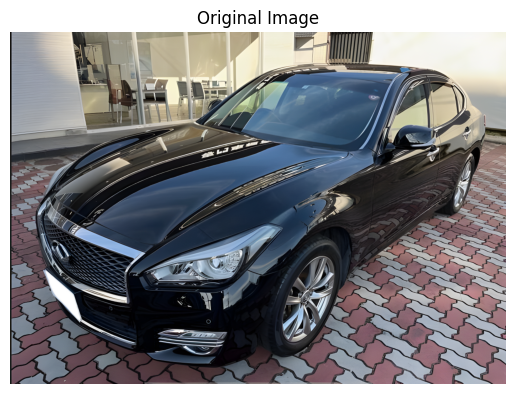

In [ ]:
# Loading and displaying images

import cv2
import matplotlib.pyplot as plt

# Load an image using OpenCV
image = cv2.imread('drive/MyDrive/Computer Vision/image_examples/nissanFuga.png')  # Loads an image in BGR format

# Convert from BGR (OpenCV default) to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')  # Hide axis for cleaner output
plt.show()

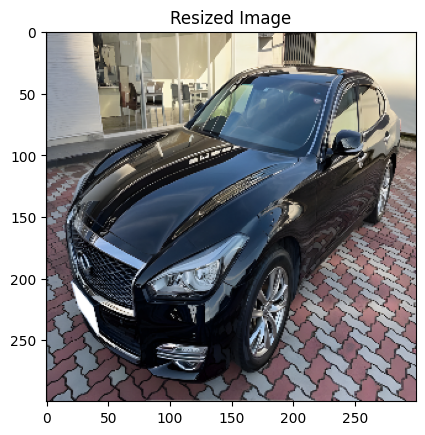

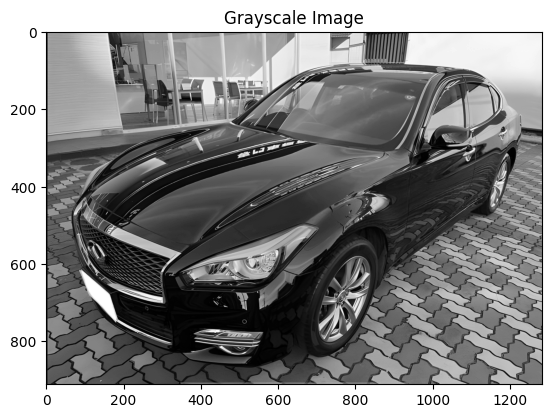

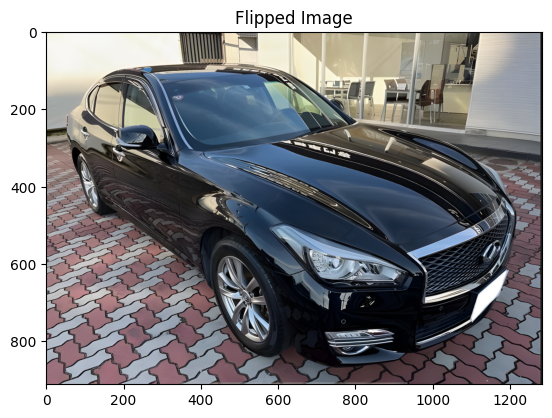

In [ ]:
# Resize the image
resized_image = cv2.resize(image_rgb, (300, 300))
plt.imshow(resized_image)
plt.title("Resized Image")
plt.show()

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Flip the image horizontally
flipped_image = cv2.flip(image_rgb, 1)
plt.imshow(flipped_image)
plt.title("Flipped Image")
plt.show()


## Image Filtering and Edge Detection

Objective:
Learn how to apply basic image filtering techniques such as smoothing, blurring, and sharpening.
Understand and implement edge detection techniques using Sobel filters and Canny edge detection.


1. Image Filtering
Image filtering involves processing an image to enhance specific features or suppress unwanted noise and artifacts. Filters are typically applied using kernels (small matrices) that are convolved with the image, producing the desired effect.

Common Types of Filters:
1.1. Smoothing and Blurring Filters: Blurring is one of the most common image processing techniques used to reduce noise and smooth details. The most popular blurring techniques include average blurring, Gaussian blurring, and median blurring.

1.1.1. Average Blurring (Mean Filtering):
Purpose: The average blur is used to smooth an image by reducing noise. The pixel value in the resulting image is the average of the neighboring pixels.
How it Works: A kernel (e.g., 3x3 or 5x5) slides across the image, replacing each pixel with the average value of its surrounding pixels.


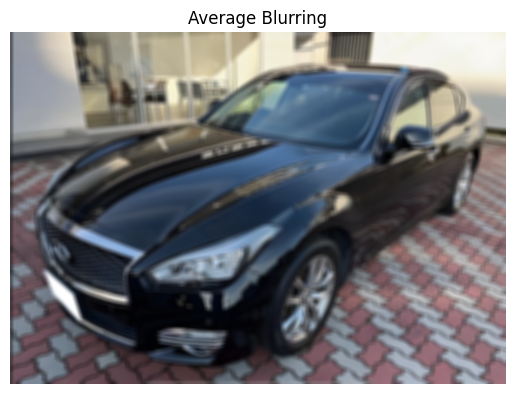

In [ ]:
# Apply average blurring (kernel size 5x5)
blurred_image = cv2.blur(image, (15, 15))

# Display the result
plt.imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
plt.title("Average Blurring")
plt.axis('off')
plt.show()


1.1.2. Gaussian Blurring:


Purpose: Gaussian blurring uses a Gaussian kernel to smooth the image. It's more natural than average blurring and preserves edges better.


How it Works: It uses a weighted average of the surrounding pixels, with more emphasis on the center pixel. The Gaussian kernel is defined by its standard deviation (sigma), which controls the amount of blurring.


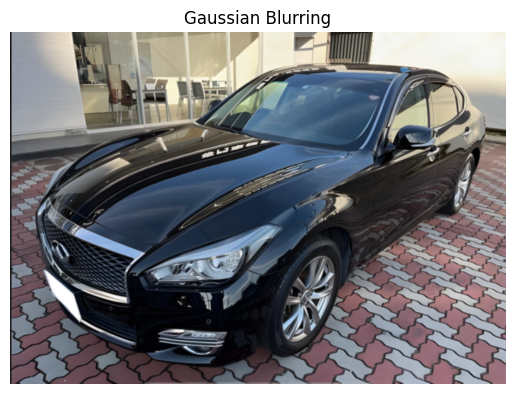

In [ ]:
# Apply Gaussian blurring (kernel size 5x5, standard deviation 0)
gaussian_blurred = cv2.GaussianBlur(image, (5, 5), 0)

# Display the result
plt.imshow(cv2.cvtColor(gaussian_blurred, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blurring")
plt.axis('off')
plt.show()


1.1.3. Median Blurring:
Purpose: Median blurring is particularly effective in removing salt-and-pepper noise. Unlike other filters, the median filter replaces each pixel with the median value of the surrounding pixels.
How it Works: A kernel slides across the image, and the pixel value is replaced by the median of its neighbors, reducing noise while preserving edges better than other smoothing filters.


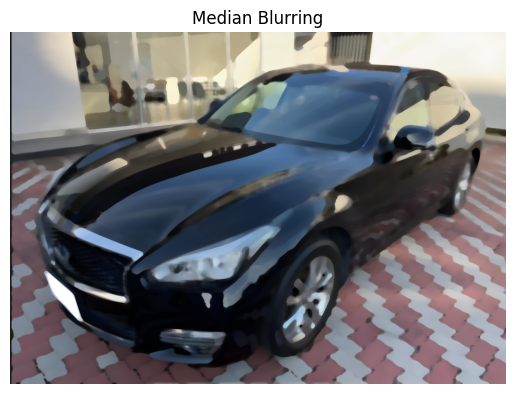

In [ ]:
# Apply median blurring (kernel size 5x5)
median_blurred = cv2.medianBlur(image, 15)

# Display the result
plt.imshow(cv2.cvtColor(median_blurred, cv2.COLOR_BGR2RGB))
plt.title("Median Blurring")
plt.axis('off')
plt.show()


# Sharpening images

Sharpening enhances the edges in an image, making it look crisper and more defined. This is achieved by applying a kernel that emphasizes the differences between neighboring pixels.

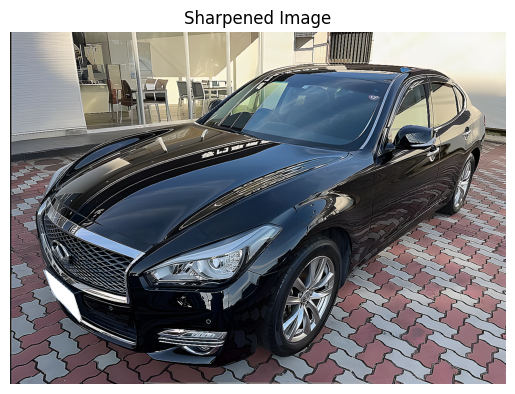

In [ ]:
import numpy as np

# Define a sharpening kernel
sharpen_kernel = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]])

# Apply the sharpening kernel to the image
sharpened_image = cv2.filter2D(image, -1, sharpen_kernel)

# Display the result
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis('off')
plt.show()


cv2.filter2D(image, -1, kernel): Applies a custom kernel for filtering, where -1 means the output image has the same depth as the input image.

# Edge Detection

Edge detection is a crucial step in image processing for identifying boundaries between objects or features. It detects significant transitions in intensity and highlights areas where there are rapid changes in pixel values.

2.1. Sobel Edge Detection:
The Sobel operator detects edges by calculating the gradient of pixel intensity in two directions: horizontal (X) and vertical (Y). It is useful for detecting the direction and magnitude of edges.

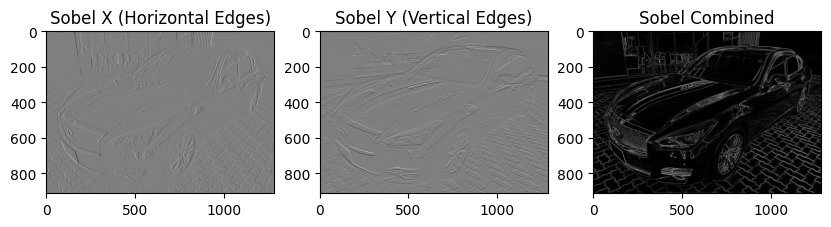

In [ ]:
# Convert image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel edge detection (horizontal and vertical)
sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)  # Horizontal edges
sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)  # Vertical edges

# Combine both directions
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# Display the results
plt.figure(figsize=(10, 4))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray')
plt.title("Sobel X (Horizontal Edges)")

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray')
plt.title("Sobel Y (Vertical Edges)")

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray')
plt.title("Sobel Combined")

plt.show()
